In [1]:
#import liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import os

In [2]:
#load data
path =r'../input/used-car-dataset-ford-and-mercedes'
paths=(os.listdir(path))
data=pd.DataFrame()
for i in paths:
    data_samble=pd.read_csv(os.path.join(path,i))
    data_samble['car_type']=(i.split('.')[0])
    
    if data_samble.shape[1]==10:
        if 'tax(£)' in data_samble.columns.values:
               data_samble=data_samble.rename(columns={"tax(£)":"tax"})
    
        data = pd.concat([data,data_samble], axis=0)


    #target.append(i)


In [3]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0,merc
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0,merc
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1,merc
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0,merc


In [4]:
data.info()#to know number of null and type of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 13118
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   car_type      99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.3+ MB


In [5]:
## from here you can see min , max,std and  count of each columns
data.describe()


,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [6]:
# we see in max year is 2060 and this is very wrong
# delete wrong data 
drop=data[data['year']>2022].index.values
data.drop(drop, axis=0, inplace=True)


In [7]:
##Delete the duplicate data 
data = data.drop_duplicates()
# Show the sum of duplicated in Data 
DuplicatedDataSum = data.duplicated().sum()
print("Sum of the Dublicate in Data",DuplicatedDataSum)


Sum of the Dublicate in Data 0


#analysis the data 

In [8]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0,merc
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0,merc
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1,merc
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0,merc


In [9]:
# the most expensive car 
data[(data['price']== data['price'].max())]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0,merc


In [10]:
# the min car comumption mpg

data[(data['mpg']== data['mpg'].min())]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
14504,Golf SV,2019,17950,Manual,100,Petrol,145,0.3,1.0,vw


In [11]:
# the max car comumption mpg

data[(data['mpg']== data['mpg'].max())]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6,bmw
621,i3,2017,19998,Automatic,41949,Hybrid,140,470.8,0.0,bmw
778,i3,2017,19998,Automatic,41146,Hybrid,0,470.8,0.0,bmw
780,i3,2017,21898,Automatic,10839,Hybrid,0,470.8,0.0,bmw
1866,i3,2017,19980,Automatic,26965,Hybrid,140,470.8,0.0,bmw
2352,i3,2016,19490,Automatic,8421,Hybrid,0,470.8,0.0,bmw
3277,i3,2016,16482,Automatic,43695,Hybrid,0,470.8,0.0,bmw
3628,i3,2015,14285,Automatic,65800,Hybrid,0,470.8,0.0,bmw
3913,i3,2017,18500,Automatic,36429,Hybrid,0,470.8,0.0,bmw
4100,i3,2017,19495,Automatic,17338,Hybrid,135,470.8,0.0,bmw


In [12]:
# the max car for tax

data[(data['tax']== data['tax'].max())]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
7475,R8,2014,59990,Automatic,31930,Petrol,580,21.9,5.2,audi
9076,R8,2008,33950,Automatic,52500,Petrol,580,21.0,4.2,audi
3163,Mustang,2017,27890,Semi-Auto,26452,Petrol,580,23.5,5.0,ford
11097,Mustang,2016,27925,Manual,11600,Petrol,580,20.9,5.0,ford
9939,M3,2009,16950,Manual,65000,Petrol,580,21.9,4.0,bmw
13826,Touareg,2007,7495,Automatic,122965,Diesel,580,26.9,3.0,vw
3280,C Class,2013,23000,Semi-Auto,43442,Petrol,580,23.0,6.2,merc
6380,M Class,2014,32995,Semi-Auto,33271,Petrol,580,23.9,5.5,merc
11639,G Class,2013,45000,Automatic,52438,Diesel,580,25.2,3.0,merc
12786,C Class,2014,21495,Automatic,56444,Petrol,580,23.5,6.2,merc


In [13]:
# the max cars have engineSize

data[(data['engineSize']== data['engineSize'].max())]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
9585,7 Series,2017,52950,Automatic,22000,Petrol,150,22.1,6.6,bmw
9799,7 Series,2017,57000,Automatic,11297,Petrol,145,22.1,6.6,bmw


In [14]:
#this code to display two data frame horizontal
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [15]:
#the most cheapest ten car
#the most expensive ten car
display_side_by_side(data.sort_values(by=['price']).head(10),data.sort_values(by=['price']).tail(10) ,titles=['the most cheapest ten car','the most expensive ten car'])


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_type
13619,Agila,2003,450,Manual,90000,Petrol,205,43.5,1.2,vauxhall
5920,Astra,2001,450,Manual,159000,Petrol,235,40.4,1.6,vauxhall
3258,Corsa,2002,495,Manual,99842,Petrol,145,50.4,1.0,vauxhall
17103,Focus,2003,495,Manual,177644,Petrol,200,41.5,1.6,ford
3272,Corsa,2003,590,Manual,82000,Petrol,160,44.8,1.2,vauxhall
11816,A Class,2003,650,Manual,109090,Petrol,235,40.0,1.4,merc
16904,Focus,2005,675,Manual,121000,Petrol,235,39.8,2.0,ford
14222,Mondeo,2005,675,Manual,97000,Diesel,205,48.7,2.0,ford
16811,Mondeo,2005,675,Manual,108000,Petrol,260,36.2,1.8,ford
16704,Fiesta,2008,694,Manual,82020,Petrol,145,47.1,1.2,ford


In [16]:
## sum of sales foe every car_type
car_type=[]
price=[]
car_type_sum_prise={'car_type':car_type,'price':price}

for i in data['car_type'].unique():
    #print(data[data['continent']==i]['gdp_cap'].sum(),i)
    price.append(data[data['car_type']==i]['price'].sum())
    car_type.append(i)
    
car_type_sum_prise= pd.DataFrame(car_type_sum_prise)
# to sort data 
car_type_sum_prise.sort_values(by=['price'], inplace=True)
car_type_sum_prise

,car_type,price
7,hyundi,60762562
1,toyota,83937124
2,skoda,88394359
4,vauxhall,136746453
3,ford,218530543
0,audi,241452046
5,bmw,241996965
6,vw,250320026
8,merc,316824443


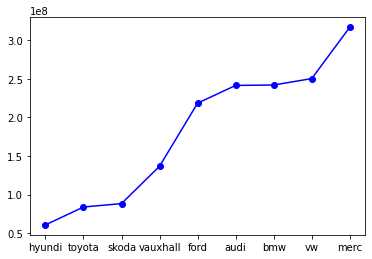

In [17]:
## plot sum of sales foe every car_type

plt.plot(car_type_sum_prise['car_type'],car_type_sum_prise['price'],marker='o', color='b')

In [18]:
#sum of sales for each model
model=[]
price=[]
model_sum_prise={'model':model,'price':price}

for i in data['model'].unique():
    #print(data[data['continent']==i]['gdp_cap'].sum(),i)
    price.append(data[data['model']==i]['price'].sum())
    model.append(i)
    
model_sum_prise= pd.DataFrame(model_sum_prise)
# to sort data 
model_sum_prise.sort_values(by=['price'], inplace=True)

In [19]:
#the most cheapest ten car model
#the most expensive ten car model
display_side_by_side(model_sum_prise.head(10),model_sum_prise.tail(10) ,titles=['the most cheapest ten car model','the most expensive ten car model'])



,model,price
164,Accent,1295
167,Amica,1750
24,A2,2490
77,Escort,3000
76,Streetka,3849
192,230,4500
165,Terracan,6185
100,Vectra,6435
151,Fox,6934
99,Tigra,7289


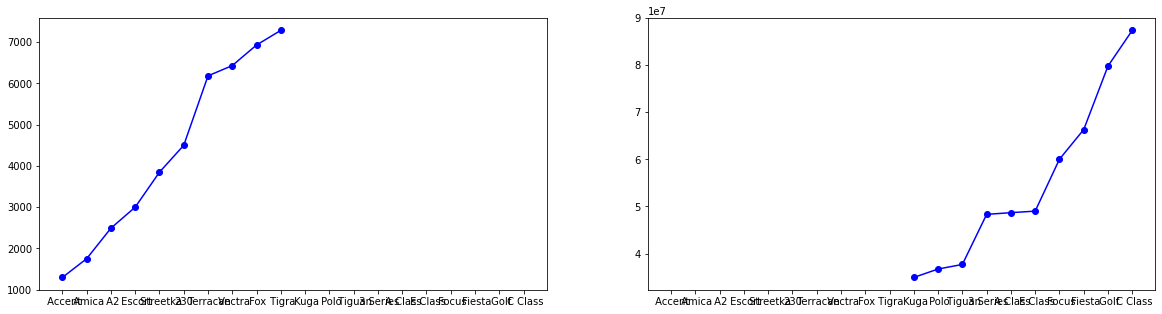

In [20]:
f,ax= plt.subplots(1, 2, figsize=(20, 5), sharex=True)
#ax.plot(car_type_sum_mpg['car_type'],car_type_sum_mpg['mpg'],marker='o', color='b',data=data,ax=ax[0])
ax[0].plot(model_sum_prise['model'].head(10),model_sum_prise['price'].head(10),marker='o', color='b')


ax[1].plot(model_sum_prise['model'].tail(10),model_sum_prise['price'].tail(10),marker='o', color='b')


In [21]:
#comsuption each car_type for mpg
car_type=[]
mpg=[]
car_type_sum_mpg={'car_type':car_type,'mpg':mpg}

for i in data['car_type'].unique():
    #print(data[data['continent']==i]['gdp_cap'].sum(),i)
    mpg.append(data[data['car_type']==i]['mpg'].sum())
    car_type.append(i)
    
car_type_sum_mpg= pd.DataFrame(car_type_sum_mpg)
# to sort data 
car_type_sum_mpg.sort_values(by=['mpg'], inplace=True)

display_side_by_side(car_type_sum_mpg,pd.DataFrame(data['car_type'].value_counts()),titles=['car_type_sum_mpg','number of car for each type'])


car_type_sum_mpg 
 
 
 
 car_type 
 mpg 
 
 
 
 
 7 
 hyundi 
 257022.40 
 
 
 2 
 skoda 
 350233.30 
 
 
 1 
 toyota 
 422564.40 
 
 
 0 
 audi 
 537098.80 
 
 
 5 
 bmw 
 602336.00 
 
 
 4 
 vauxhall 
 682908.92 
 
 
 8 
 merc 
 709840.30 
 
 
 6 
 vw 
 800835.70 
 
 
 3 
 ford 
 1031369.20 
 
 
 number of car for each type 
 
 
 
 car_type 
 
 
 
 
 ford 
 17810 
 
 
 vw 
 14893 
 
 
 vauxhall 
 13258 
 
 
 merc 
 12860 
 
 
 bmw 
 10664 
 
 
 audi 
 10565 
 
 
 toyota 
 6699 
 
 
 skoda 
 6188 
 
 
 hyundi 
 4774

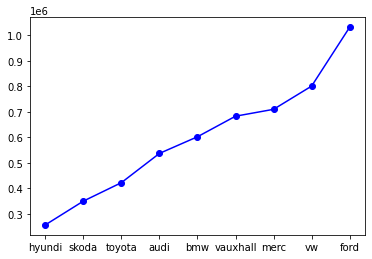

In [22]:
plt.plot(car_type_sum_mpg['car_type'],car_type_sum_mpg['mpg'],marker='o', color='b')

In [23]:
#sum of tax for each car_type

car_type=[]
tax=[]
car_type_sum_tax={'car_type':car_type,'tax':tax}

for i in data['car_type'].unique():
    #print(data[data['continent']==i]['gdp_cap'].sum(),i)
    tax.append(data[data['car_type']==i]['tax'].sum())
    car_type.append(i)
    
car_type_sum_tax= pd.DataFrame(car_type_sum_tax)
# to sort data 
car_type_sum_tax.sort_values(by=['tax'], inplace=True)
car_type_sum_tax

,car_type,tax
7,hyundi,578550
1,toyota,633390
2,skoda,726785
0,audi,1330230
5,bmw,1403355
8,merc,1669790
6,vw,1675895
4,vauxhall,1703015
3,ford,2018140


<BarContainer object of 9 artists>

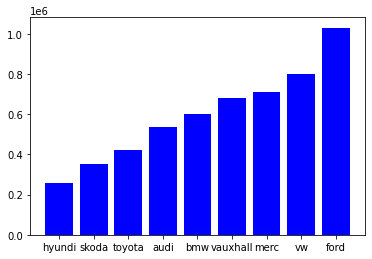

In [24]:
plt.bar(car_type_sum_mpg['car_type'],car_type_sum_mpg['mpg'],color='b')

In [25]:
# number of sales for each year 
car_sales=[]
year=[]
year_number_of_sales ={'year':year,'car_sales':car_sales}

for i in data['year'].unique():
    #print(data[data['continent']==i]['gdp_cap'].sum(),i)
    car_sales.append(data[data['year']==i]['model'].count())
    year.append(i)
    
year_number_of_sales= pd.DataFrame(year_number_of_sales)
# to sort data 
year_number_of_sales.sort_values(by=['car_sales'], inplace=True)
year_number_of_sales

,year,car_sales
25,1970,2
24,1996,2
20,1997,4
22,1999,6
19,1998,8
23,2000,9
21,2001,20
17,2002,31
15,2003,34
8,2004,52


In [26]:
#we show that 1970 in year is outlier index=25

<BarContainer object of 26 artists>

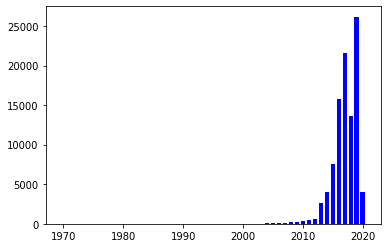

In [27]:
plt.bar(year_number_of_sales['year'],year_number_of_sales['car_sales'],color='b')


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<BarContainer object of 25 artists>

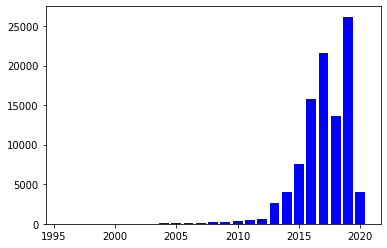

In [28]:
drop=data[data['year']<1980].index.values

data.drop(drop, axis=0, inplace=True)
year_number_of_sales.drop([25], axis=0, inplace=True)
plt.bar(year_number_of_sales['year'],year_number_of_sales['car_sales'],color='b')

In [29]:
# number of sales for each car type in year 

car_sales={x:[] for x in data['car_type'].unique()}
car_sales['year']=[]
for i in data['year'].unique():
    for car in data['car_type'].unique():
        car_sales[f'{car}'].append(len(data[(data['year']==i)&(data['car_type']==car)]))
    car_sales['year'].append(i)
    
car_sales= pd.DataFrame(car_sales)
# to sort data 
car_sales.sort_values(by=['year'], inplace=True)
car_sales

,audi,toyota,skoda,ford,vauxhall,bmw,vw,hyundi,merc,year
24,0,0,0,1,0,1,0,0,0,1996
20,1,0,0,0,1,1,0,0,1,1997
19,1,1,0,1,0,1,0,0,4,1998
22,0,1,0,0,0,4,0,0,1,1999
23,0,1,0,1,0,2,1,1,3,2000
21,0,1,0,0,2,3,4,0,10,2001
17,2,4,0,3,5,6,1,1,9,2002
15,6,6,0,3,5,2,2,3,7,2003
8,5,7,1,4,7,12,3,0,13,2004
16,7,12,2,16,8,6,8,1,9,2005


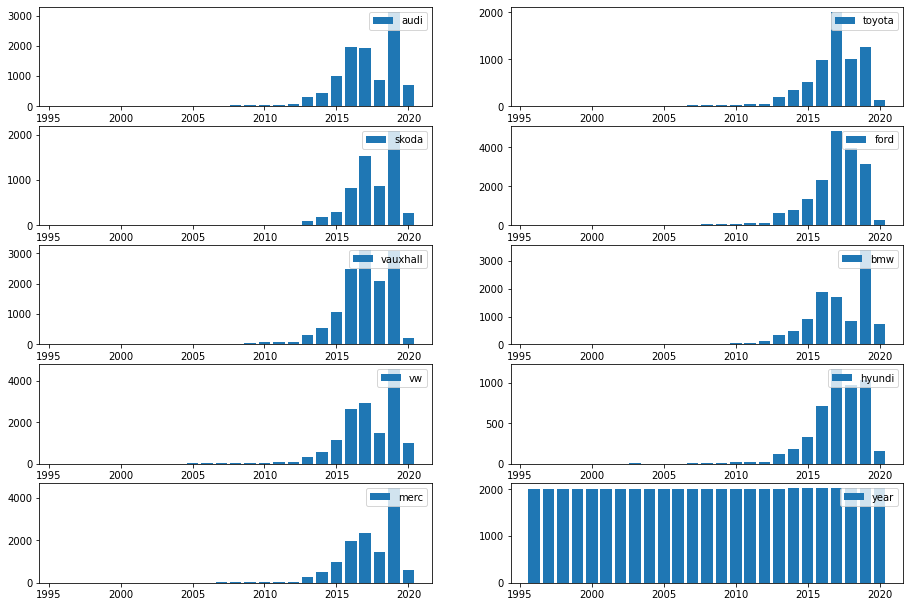

In [30]:
#plot sales
fig,axs=plt.subplots(5,2)
feature=list(car_sales.columns)
index=-1
for row in range(5):
    for columns in range(2):
        index+=1
        axs[row,columns].bar(car_sales['year'],car_sales[feature[index]],label=f'{feature[index]}')
        axs[row,columns].legend(loc=1)


plt.subplots_adjust(left=0,right=2,bottom=0,top=2)

In [31]:
# number of sales for each transmission in year 

car_sales={x:[] for x in data['transmission'].unique()}
car_sales['year']=[]
for i in data['year'].unique():
    for car in data['transmission'].unique():
        car_sales[f'{car}'].append(len(data[(data['year']==i)&(data['transmission']==car)]))
    car_sales['year'].append(i)
    
car_sales= pd.DataFrame(car_sales)
# to sort data 
car_sales.sort_values(by=['year'], inplace=True)
car_sales

,Manual,Automatic,Semi-Auto,Other,year
24,1,1,0,0,1996
20,2,2,0,0,1997
19,3,5,0,0,1998
22,3,3,0,0,1999
23,3,6,0,0,2000
21,7,12,1,0,2001
17,15,15,1,0,2002
15,19,15,0,0,2003
8,27,23,2,0,2004
16,51,18,0,0,2005


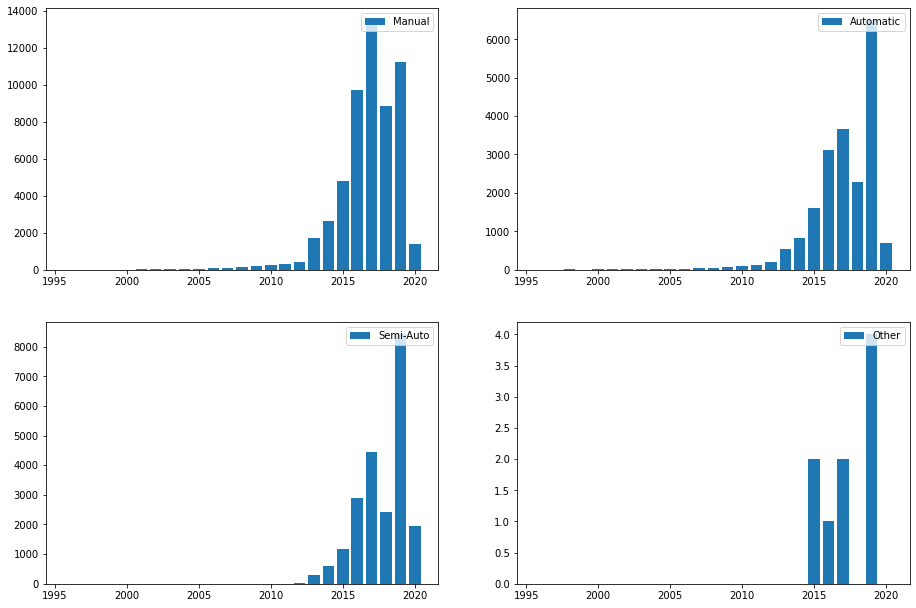

In [32]:
#plot sales for transmission
fig,axs=plt.subplots(2,2)
feature=list(car_sales.columns)
index=-1
for row in range(2):
    for columns in range(2):
        index+=1
        axs[row,columns].bar(car_sales['year'],car_sales[feature[index]],label=f'{feature[index]}')
        axs[row,columns].legend(loc=1)


plt.subplots_adjust(left=0,right=2,bottom=0,top=2)

In [33]:
# show number of unique values for each column
columns=data.columns.values
unique=[]
data_unique={'columns':columns,'unique_value':unique}
for column in columns:
    unique.append(len(data[column].unique()))
    
data_unique= pd.DataFrame(data_unique)
# to sort data 
data_unique.sort_values(by=['unique_value'], inplace=True)
data_unique

,columns,unique_value
3,transmission,4
5,fuelType,5
9,car_type,9
1,year,25
8,engineSize,40
6,tax,48
0,model,195
7,mpg,208
2,price,13236
4,mileage,42212


<AxesSubplot:>

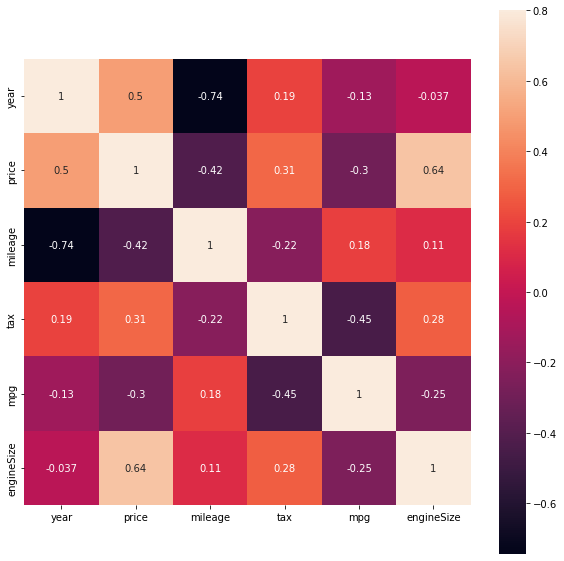

In [34]:
pd.get_dummies(data.drop('model', axis='columns'))
corrmat = data.corr()
#f, ax = plt.subplots(figsize=(12, 9))
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)


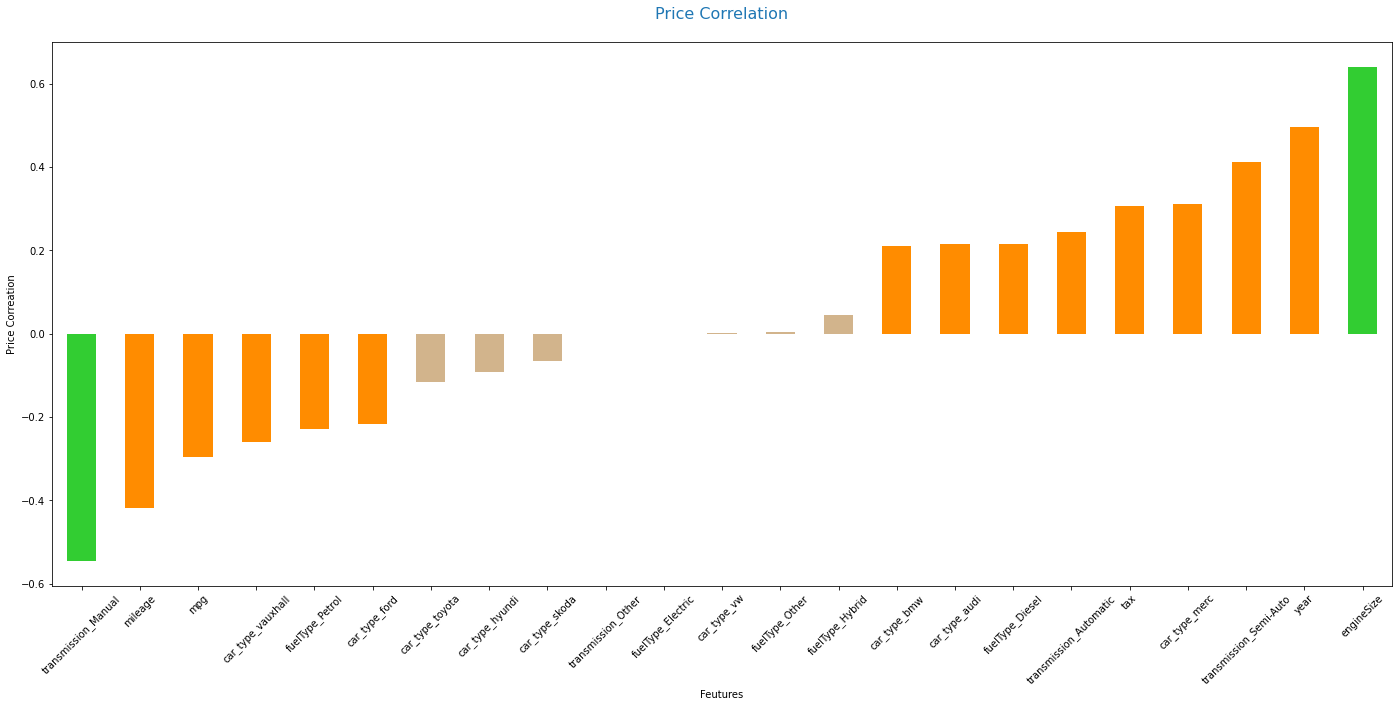

In [35]:
# plot correration by bar
data_wo_model=pd.get_dummies(data.drop('model', axis='columns'))
#MB_data_wo_model.columns=MB_data_wo_model.columns.str.replace('.*_', 'bla_').str.strip('bla_')
#MB_data_wo_model.head()
price_corr=data_wo_model.corr()['price'].sort_values()[:-1]
price_corr=pd.DataFrame(price_corr)
price_corr.columns=['corr']

#set colors
cond=[
    abs(price_corr['corr']).gt(0).le(0.2),
    abs(price_corr['corr']).gt(0.2).le(0.5),
    abs(price_corr['corr']).gt(0.5).le(0.7),
    abs(price_corr['corr']).gt(0.7).le(0.9),
    abs(price_corr['corr']).gt(0.9)
    ]
value=['Very Low','Low','Everage','High','Very High']
color=['whitesmoke','tan','darkorange','limegreen','darkgreen',]

price_corr['corr_type']=np.select(cond, value)
price_corr['color']=np.select(cond, color)

#price_corr

bar=price_corr['corr'].plot(kind='bar', 
                figsize=(24,10),
                color=price_corr['color'])
bar.set_title('Price Correlation\n', fontsize=16, color='tab:blue')
bar.set_ylabel('Price Correation')
bar.set_xlabel('Feutures')

plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


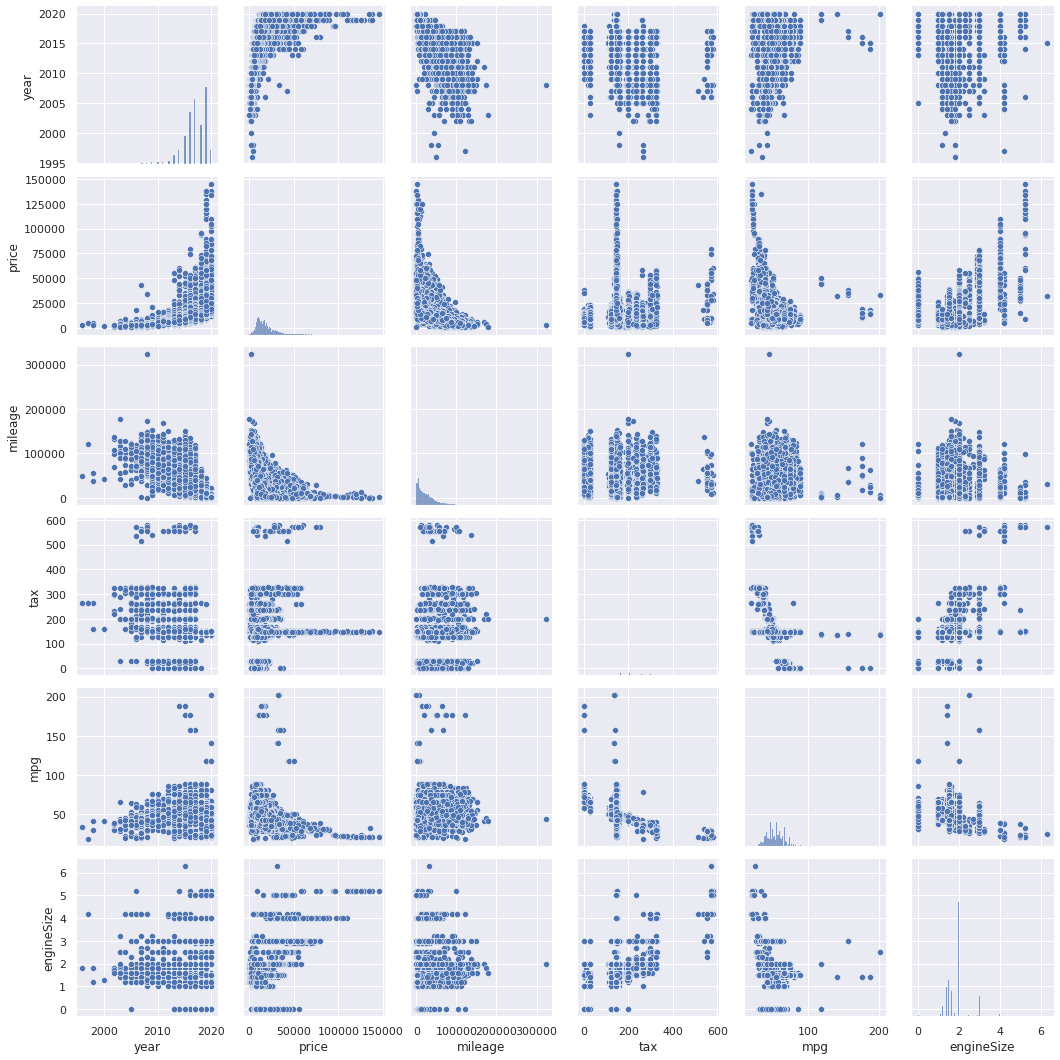

In [36]:
#if you run code in jupyter you can use 
# if you run code in jupyter you can see all data and detect outlier values
'''sns.set()
cols =data.columns.values
sns.pairplot(data[cols], size = 2.5,data=data['price'])
plt.show()'''
## and run this in kaggle
sns.set()
cols =data.columns.values
sns.pairplot(data.loc[~data.index.duplicated(), :][cols], size = 2.5,data=data.loc[~data.index.duplicated(), :]['price'])
plt.show()

0 transmission
1 fuelType
2 car_type


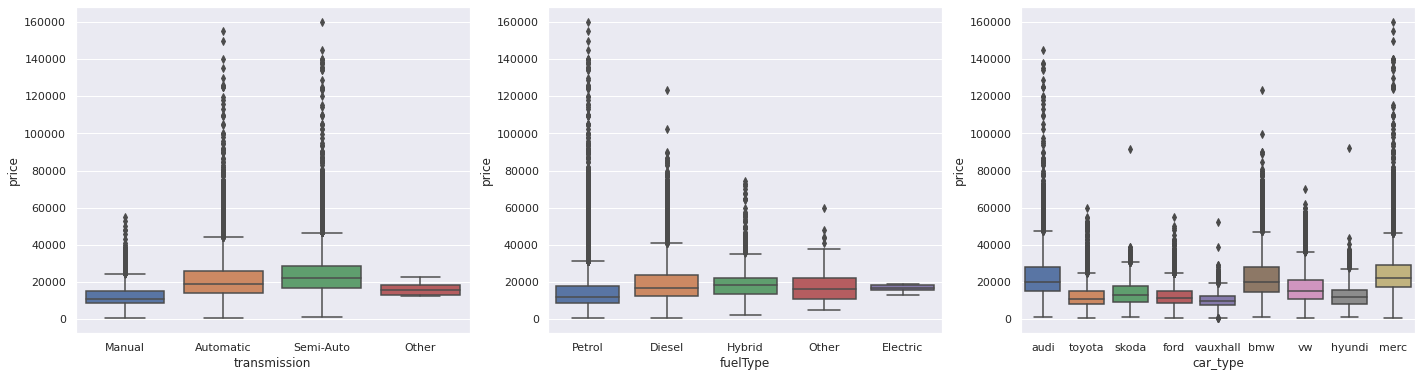

In [37]:
#plot boxplot to know range for each columns and outlier value
cat_col_wo_price=data.drop(['model'], axis='columns').select_dtypes(exclude=np.number).columns

fig, axes = plt.subplots(1, len(cat_col_wo_price), figsize=(24,6))

for i, c in enumerate(cat_col_wo_price):
    print(i, c)
    
    sns.boxplot(data=data, x=c, y='price',
               ax=axes[i])

plt.show()

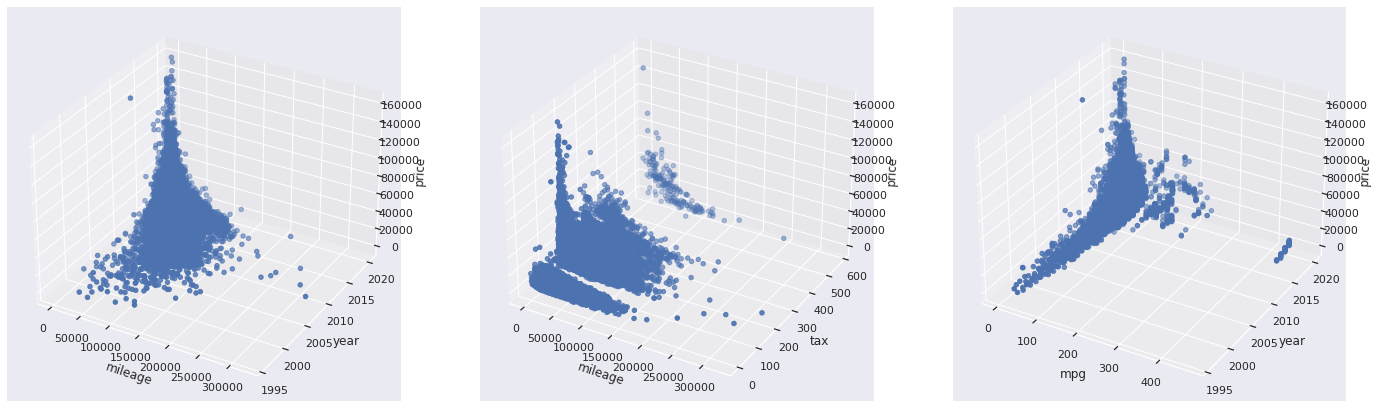

In [38]:
#plot 3D Relation
fig=plt.figure(figsize=(24,10))

axes1=fig.add_subplot(131, projection='3d')
axes2=fig.add_subplot(132, projection='3d')
axes3=fig.add_subplot(133,projection='3d')


axes1.scatter(data['mileage'], data['year'] , data['price'],
          marker='o')
axes1.set_xlabel('mileage')
axes1.set_ylabel('year')
axes1.set_zlabel('price')

axes2.scatter(data['mileage'],data['tax'], data['price'], marker='o')

axes2.set_xlabel('mileage')
axes2.set_ylabel('tax')
axes2.set_zlabel('price')


axes3.scatter(data['mpg'],data['year'], data['price'], marker='o')

axes3.set_xlabel('mpg')
axes3.set_ylabel('year')
axes3.set_zlabel('price')

fig.show()

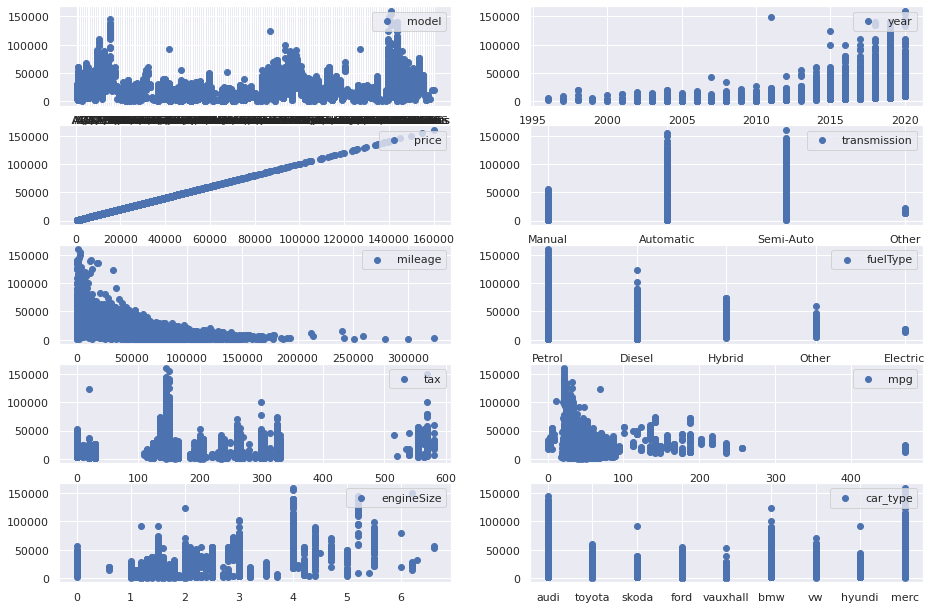

In [39]:
#plot every column with price
fig,axs=plt.subplots(5,2)
feature=list(data.columns)
index=-1
for row in range(5):
    for columns in range(2):
        index+=1
        axs[row,columns].scatter(data[feature[index]],data['price'],label=f'{feature[index]}')
        axs[row,columns].legend(loc=1)


plt.subplots_adjust(left=0,right=2,bottom=0,top=2)

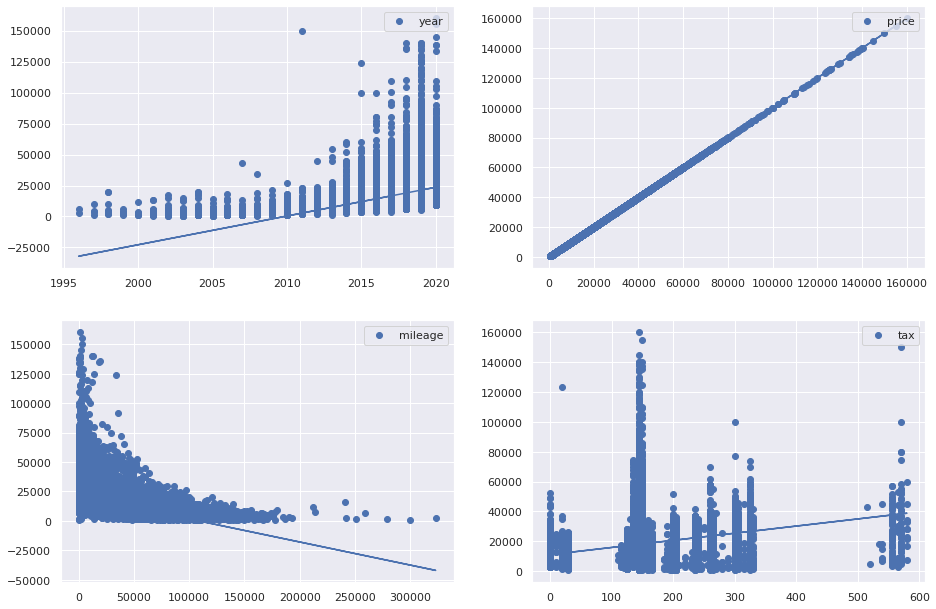

In [40]:
#plot fit line
fig,axs=plt.subplots(2,2)
feature=data.select_dtypes(include=(np.int64)).columns[:4]
index=-1
for row in range(2):
    for columns in range(2):
        index+=1
        axs[row,columns].scatter(data[feature[index]],data['price'],label=f'{feature[index]}')
        m, b = np.polyfit(data[feature[index]],  data['price'], 1)
        axs[row,columns].plot(data[feature[index]], m*data[feature[index]] + b)
        axs[row,columns].legend(loc=1)


plt.subplots_adjust(left=0,right=2,bottom=0,top=2)

In [41]:
#detect outliers
outlier_sample=[]
drop = data[(data['car_type']=='hyundi')&(data['price']>70000)].index.values
outlier_sample.extend([drop][0])
drop = data[(data['car_type']=='skoda')&(data['price']>70000)].index.values
outlier_sample.extend([drop][0])
drop = data[(data['mpg']>50)&(data['mpg']<100)&(data['price']>100000)].index.values
outlier_sample.extend([drop][0])
drop = data[(data['year']>2010)&(data['year']<2015)&(data['price']>140000)].index.values
outlier_sample.extend([drop][0])
drop = data[(data['tax']>0)&(data['tax']<100)&(data['price']>120000)].index.values
outlier_sample.extend([drop][0])

In [42]:
outlier_sample

[4247, 4993, 3638, 5, 3638]

In [43]:
#remove  outliers

data.drop(outlier_sample, axis=0, inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['model'] = encoder.fit_transform(data['model'])
country = {index : label for index, label in enumerate(encoder.classes_)}
print(country)
data['transmission'] = encoder.fit_transform(data['transmission'])
continent = {index : label for index, label in enumerate(encoder.classes_)}
print(continent)
data['fuelType'] = encoder.fit_transform(data['fuelType'])
continent = {index : label for index, label in enumerate(encoder.classes_)}
print(continent)
data['car_type'] = encoder.fit_transform(data['car_type'])
continent = {index : label for index, label in enumerate(encoder.classes_)}
print(continent)

{0: ' 1 Series', 1: ' 2 Series', 2: ' 3 Series', 3: ' 4 Series', 4: ' 5 Series', 5: ' 6 Series', 6: ' 7 Series', 7: ' 8 Series', 8: ' A Class', 9: ' A1', 10: ' A2', 11: ' A3', 12: ' A4', 13: ' A5', 14: ' A6', 15: ' A7', 16: ' A8', 17: ' Accent', 18: ' Adam', 19: ' Agila', 20: ' Amarok', 21: ' Amica', 22: ' Ampera', 23: ' Antara', 24: ' Arteon', 25: ' Astra', 26: ' Auris', 27: ' Avensis', 28: ' Aygo', 29: ' B Class', 30: ' B-MAX', 31: ' Beetle', 32: ' C Class', 33: ' C-HR', 34: ' C-MAX', 35: ' CC', 36: ' CL Class', 37: ' CLA Class', 38: ' CLC Class', 39: ' CLK', 40: ' CLS Class', 41: ' Caddy', 42: ' Caddy Life', 43: ' Caddy Maxi', 44: ' Caddy Maxi Life', 45: ' California', 46: ' Camry', 47: ' Caravelle', 48: ' Cascada', 49: ' Citigo', 50: ' Combo Life', 51: ' Corolla', 52: ' Corsa', 53: ' Crossland X', 54: ' E Class', 55: ' EcoSport', 56: ' Edge', 57: ' Eos', 58: ' Escort', 59: ' Fabia', 60: ' Fiesta', 61: ' Focus', 62: ' Fox', 63: ' Fusion', 64: ' G Class', 65: ' GL Class', 66: ' GLA C

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [45]:
x = data.drop('price', axis=1)

y = data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1000,random_state=0)
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (96668, 9)
x_test shape is: (1000, 9)
y_train shape is: (96668,)
y_test shape is: (1000,)


In [46]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=13, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Random Forest Regressor Train Score is :  0.9718035415995322
Random Forest Regressor Test Score is :  0.9595104289276918
Random Forest Regressor No. of features are :  9
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [13761.11218211 10024.40658774 21479.50299946 11359.75335386
  9744.77496235 16601.89787068 18996.55161832  7370.42175112
  7867.46954832 15381.26219398]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
for i in range(0,11):
    #print(i)
    print('Actual value: ', y_test.iloc[i], 'prediction: ', '{0:.0f}'.format(y_pred[i]), '\n')
    

Actual value:  13990 prediction:  13761 

Actual value:  10498 prediction:  10024 

Actual value:  22920 prediction:  21480 

Actual value:  12444 prediction:  11360 

Actual value:  8990 prediction:  9745 

Actual value:  19175 prediction:  16602 

Actual value:  17990 prediction:  18997 

Actual value:  6999 prediction:  7370 

Actual value:  7850 prediction:  7867 

Actual value:  15999 prediction:  15381 

Actual value:  14290 prediction:  13897 



#thankyou